In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
x = np.linspace(-10,10,100)
y1 = norm.pdf(x,loc=-3,scale=2)
y2 = norm.pdf(x,loc=3,scale=2)
p1 = 0.5
p2 = 1-p1

z = y1*p1/(y1*p1+y2*p2)
xx = np.log((1-z)/z)

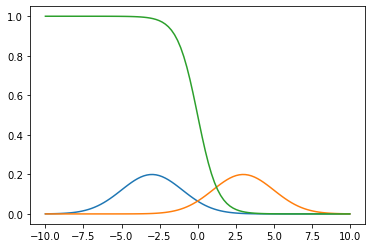

In [3]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,z)

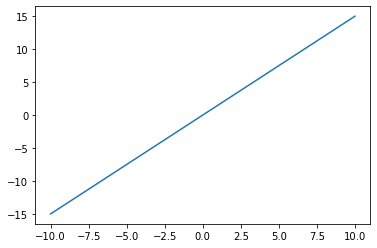

In [4]:
plt.plot(x,xx)

In [5]:
x1samp = norm.rvs(size=1000,loc=-3,scale=2)
x2samp = norm.rvs(size=1000,loc= 3,scale=2)

(array([  4.,  28.,  95., 145., 266., 238., 150.,  52.,  17.,   5.]),
 array([-3.42605961, -2.12186661, -0.8176736 ,  0.48651941,  1.79071241,
         3.09490542,  4.39909843,  5.70329143,  7.00748444,  8.31167744,
         9.61587045]),
 <BarContainer object of 10 artists>)

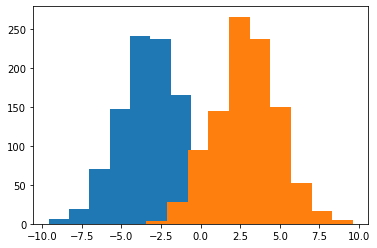

In [6]:
plt.hist(x1samp)
plt.hist(x2samp)

In [7]:
mu1 = np.mean(x1samp)
mu2 = np.mean(x2samp)
sigma2 = np.var(x1samp)
mu1, mu2, sigma2

(-3.076630176062188, 2.9186146211637873, 4.11506579161306)

In [8]:
beta1 = -(mu1-mu2)/sigma2
beta0 = -(mu2**2 - mu1**2)/2/sigma2
(beta0, beta1)

(0.11510653551593227, 1.4569013232898778)

In [9]:
df = pd.DataFrame({'x':np.append(x1samp,x2samp),'y':np.append(np.zeros(1000),np.ones(1000))})
df

,x,y
0,-4.490834,0.0
1,-3.981045,0.0
2,0.092311,0.0
3,-3.502382,0.0
4,-6.420597,0.0
...,...,...
1995,-0.480135,1.0
1996,1.049884,1.0
1997,4.847671,1.0
1998,4.404430,1.0


In [10]:
df['bin'] = pd.cut(df['x'],bins=20)

In [11]:
df2 = df.groupby('bin').agg('mean')
df2

,x,y
bin,,
"(-9.612, -8.632]",-9.179790,0.000000
"(-8.632, -7.672]",-8.188763,0.000000
"(-7.672, -6.711]",-7.108364,0.000000
"(-6.711, -5.751]",-6.182468,0.000000
"(-5.751, -4.791]",-5.215411,0.000000
"(-4.791, -3.83]",-4.278204,0.000000
"(-3.83, -2.87]",-3.390353,0.005714
"(-2.87, -1.909]",-2.415176,0.040201
"(-1.909, -0.949]",-1.448186,0.101911


In [12]:
def sigmoid(beta0,beta1,x):
    return 1/(1+np.exp(-beta0 - beta1*x))

In [13]:
model = LogisticRegression(random_state=0)
model.fit(df.iloc[:,:1],df['y'])

LogisticRegression(random_state=0)

In [14]:
model.coef_, model.intercept_

(array([[1.4047029]]), array([0.13113401]))

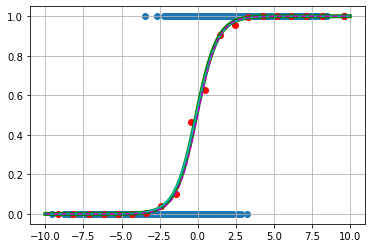

In [15]:
plt.scatter(df['x'],df['y'])
plt.plot(df2['x'],df2['y'],'ro')
plt.plot(x, sigmoid(beta0,beta1,x),'g',linewidth=4)
plt.plot(x, sigmoid(model.intercept_[0],model.coef_[0][0],x),'c')
plt.plot(x, sigmoid(0,6/4,x),'m--')
plt.grid()

In [16]:
beta0,beta1

(-0.01517039154586343, 1.4779342863559473)